In [2]:
!pip install matplotlib statsmodels scipy seaborn


  Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl (8.1 MB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------------------------- ------------ 6.6/9.6 MB 33.0 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 34.6 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 34.6 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 12.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd           
import numpy as np            
import matplotlib.pyplot as plt  
import statsmodels.formula.api as sm 
import scipy.stats as stats   
import seaborn as sns         


In [5]:
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [6]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
base.drop(['Unnamed: 0'], axis=1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


<Axes: >

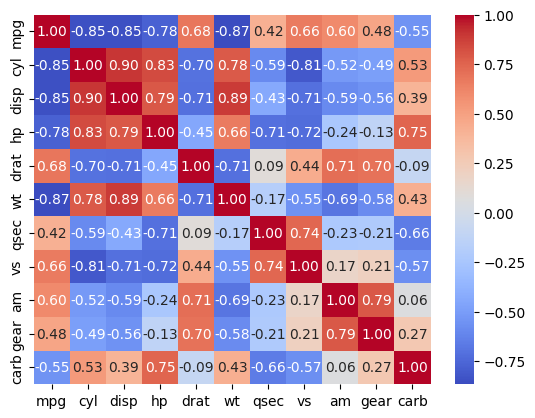

In [8]:
corr = base.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

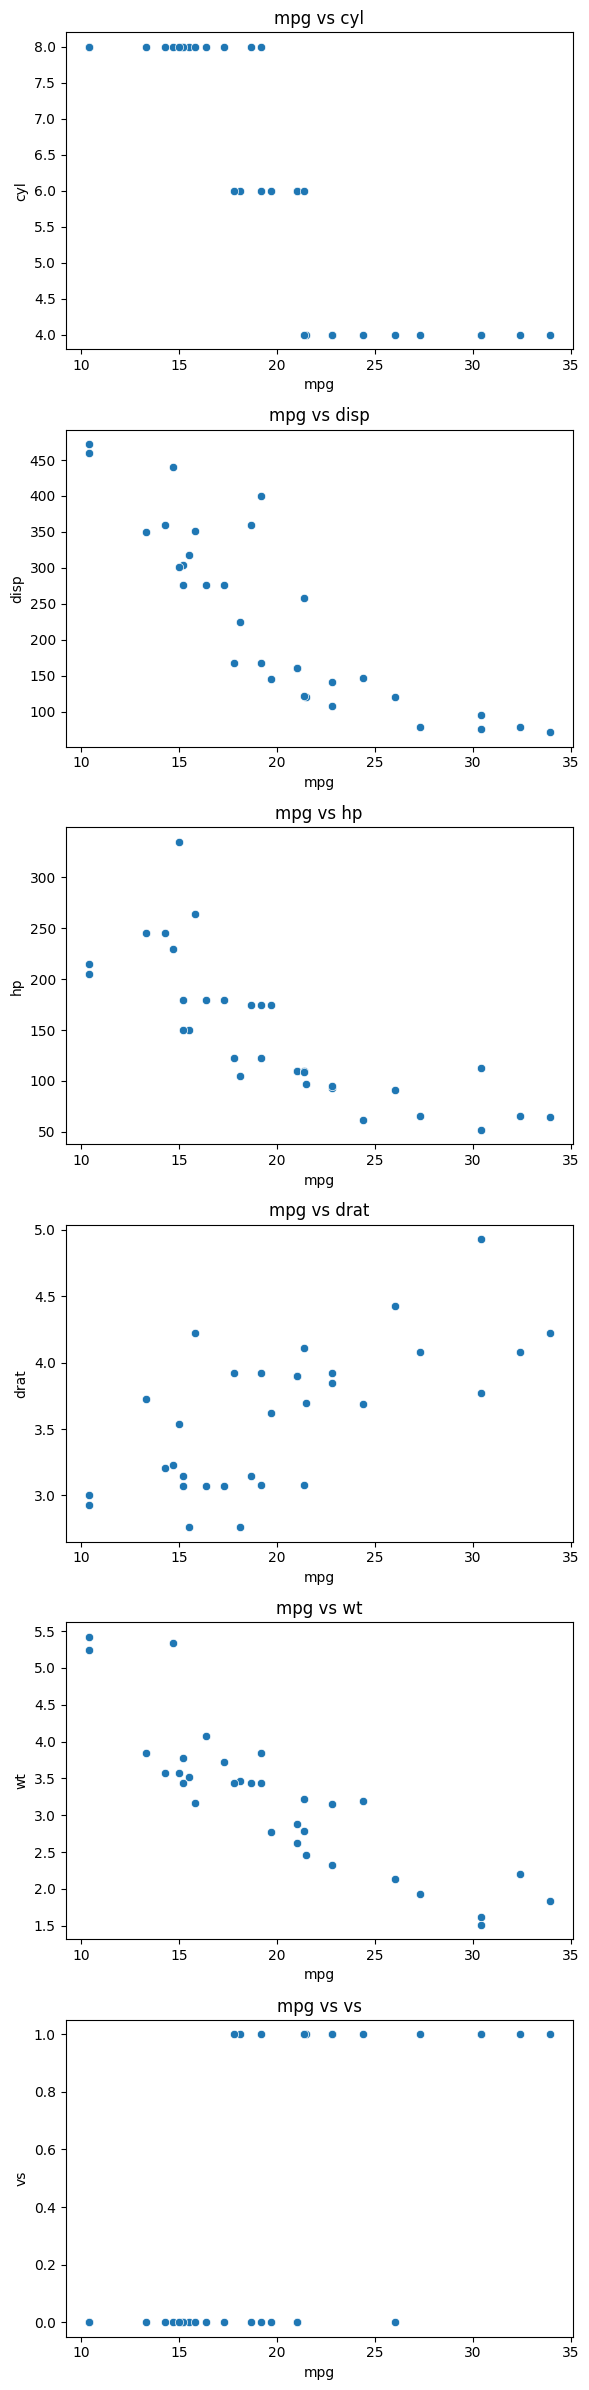

In [11]:
column_pairs = [('mpg', 'cyl'), ('mpg', 'disp'), ('mpg', 'hp'), ('mpg', 'drat'), ('mpg', 'wt'),  ('mpg', 'vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))
for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()



In [ ]:
#AIC 156.6 e BIC 162.5
#modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=base)

#AIC 165.1 e BIC 169.5
#modelo = sm.ols(formula='mpg ~ disp + cyl', data=base)

#AIC 179.1 e BIC 183.5
modelo = sm.ols(formula='mpg ~ drat + vs', data=base)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           5.82e-07
Time:                        14:27:20   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

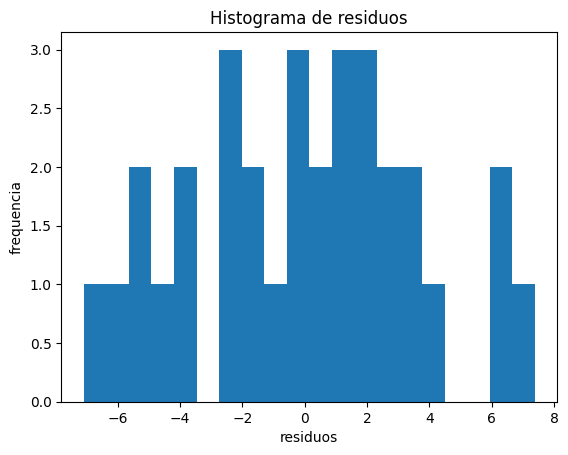

In [23]:
residuos = modelo.resid

plt.hist(residuos, bins=20)
plt.xlabel("residuos")
plt.ylabel('frequencia')
plt.title('Histograma de residuos')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

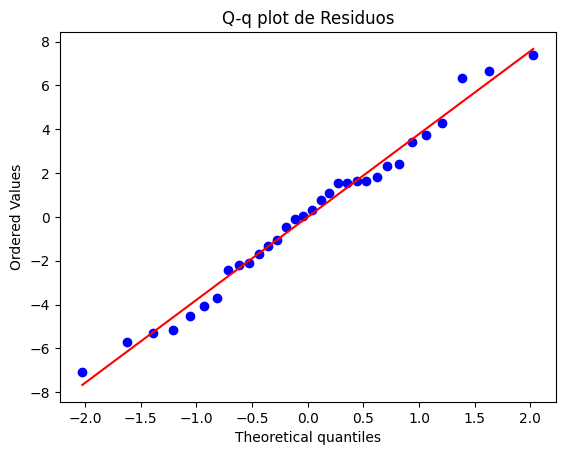

In [24]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-q plot de Residuos')
plt.show

In [26]:
# h0(hipotese nula) - dados estao normalmente distribuidos
# p <= 0.05 rejeito a h0, (nao estao normalmente distribuidos)
# p > 0.05 nao rejeito h0
stat, pval = stats.shapiro(residuos)
print(f'Shapire-Wilk statistica: {stat:.3f}, p-value: {pval:.3f}')

Shapire-Wilk statistica: 0.981, p-value: 0.822
